# Building a Mushroom Classifier

## 0. Introduction: 

In this exercise we are going to build a model which will classify if mushroom is a poisonous or an edible. 
We will be using various supervised classification algorithms to see which algorithms have better classification accuracy.

classification: poisonous or edible

## INDEX


- <a href='#1'>1. LOAD THE LIBRARIES AND READ THE DATA</a>  

    - <a href='#1.1'>1.1. LOAD LIBRARIES</a> 
    - <a href='#1.2'>1.2. READ THE DATA</a> 
    
    
- <a href='#2'>2. OVERVIEW </a> 

    - <a href='#2.1'>2.1. DATA INFORMATION </a> 
    - <a href='#2.2'>2.2. HEAD</a> 
    - <a href='#2.3'>2.3. TARGET</a>  
    - <a href='#2.4'>2.4. DATA DISTRIBUTION</a> 
    - <a href='#2.5'>2.5. MISSING VALUES</a> 
    
    
- <a href='#3'>3. REPLACE MISSING VALUES WITH MEDIAN</a>

    - <a href='#3.1'>3.1. CORRELATION WITH TARGET VARIABLE </a>
 
    
- <a href='#4'> 4. RESEARCHING FOR A BEST MODEL FOR THE GIVEN DATASET </a>
  
   
- <a href='#5'>5. MODEL OPTIMIZATION AND PERFORMANCE EVALUATION</a> 
    
    
- <a href='#6'>6. FEATURE ADDITION </a> 
 

- <a href='#7'>7. CONCLUSION </a> 
   - <a href='#7.1'>7.1. SCOPE FOR FURTHER INVESTIGATION</a>
  

## 1. Importing Dataset :

### 1.1 Loading Initial Libraries 

In [1]:
#Import initial libraries
import numpy as np
import pandas as pd

# Libraries for plotting
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Import time
import time

### 1.2 Loading the dataset:  

In [2]:
# Load the dataset. Data sourse https://archive.ics.uci.edu/ml/datasets/bank+marketing 
data = pd.read_csv("mushroom_dataset.csv", sep=',')

# Print the first 5 entriesof the dataset
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
2,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
3,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
4,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,...,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE


In [3]:
print("The dataset has {} rows and {} columns.".format(data.shape[0],data.shape[1]))

The dataset has 8416 rows and 23 columns.


#### Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
cap-shape                   8416 non-null object
cap-surface                 8416 non-null object
cap-color                   8416 non-null object
bruises                     8416 non-null object
odor                        8416 non-null object
gill-attachment             8416 non-null object
gill-spacing                8416 non-null object
gill-size                   8416 non-null object
gill-color                  8416 non-null object
stalk-shape                 8416 non-null object
stalk-root                  8416 non-null object
stalk-surface-above-ring    8416 non-null object
stalk-surface-below-ring    8416 non-null object
stalk-color-above-ring      8416 non-null object
stalk-color-below-ring      8416 non-null object
veil-type                   8416 non-null object
veil-color                  8416 non-null object
ring-number                 8416 non-null object
ring-type  

#### All are features are objects. We need to change them to into numerics. 

In [5]:
#Check for NAs in the dataset.   
print(data.isna().sum())
#Check for empty entries in the dataset. 
print(data.isnull().sum())

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
mushroom                    0
dtype: int64
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                

### Need to change the features form object type to numeric. 

In [6]:
from sklearn.preprocessing import LabelEncoder

#Encode labels with value between 0 and n_classes-1.
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [7]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,2,3,8,0,0,1,1,1,10,1,...,7,7,0,2,1,4,6,4,6,0
1,2,3,8,0,0,1,1,1,10,1,...,7,7,0,2,1,4,1,4,6,0
2,2,3,8,0,0,1,1,1,7,1,...,7,7,0,2,1,4,6,4,6,0
3,2,3,8,0,0,1,1,1,7,1,...,7,7,0,2,1,4,1,4,6,0
4,2,3,8,0,0,1,1,1,1,1,...,7,7,0,2,1,4,6,4,6,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
cap-shape                   8416 non-null int64
cap-surface                 8416 non-null int64
cap-color                   8416 non-null int64
bruises                     8416 non-null int64
odor                        8416 non-null int64
gill-attachment             8416 non-null int64
gill-spacing                8416 non-null int64
gill-size                   8416 non-null int64
gill-color                  8416 non-null int64
stalk-shape                 8416 non-null int64
stalk-root                  8416 non-null int64
stalk-surface-above-ring    8416 non-null int64
stalk-surface-below-ring    8416 non-null int64
stalk-color-above-ring      8416 non-null int64
stalk-color-below-ring      8416 non-null int64
veil-type                   8416 non-null int64
veil-color                  8416 non-null int64
ring-number                 8416 non-null int64
ring-type                   8

#### Now all features are numerics: 

## 2. Data Exploration and Pre-processing

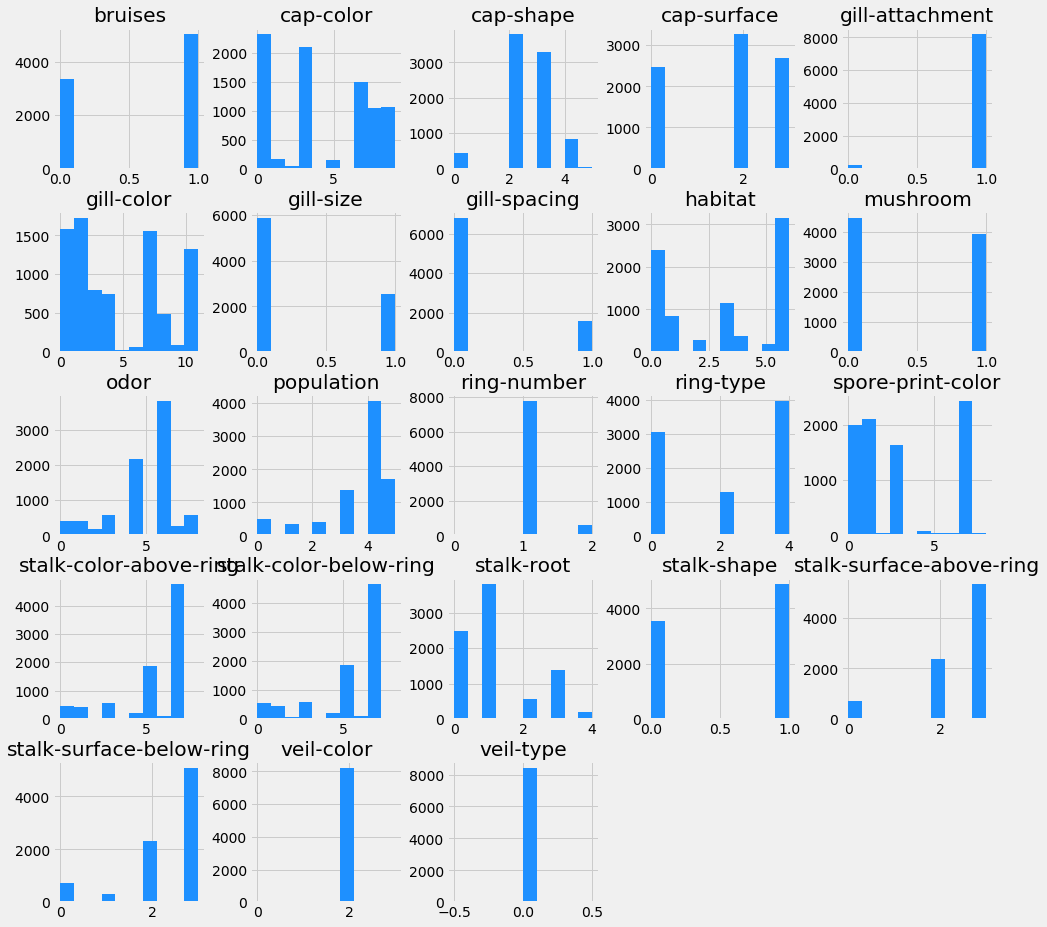

In [9]:
#For distribution of our data lets visualize the data as a histograms
plt.style.use('fivethirtyeight')
data.hist(figsize=(15,15),color='dodgerblue')
plt.show()

In [10]:
# Correlation amongs the variables
correlation = data.corr()

# Check the correlation between the dataset
data.corr()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
cap-shape,1.000000,-0.007695,-0.177459,0.198068,0.248895,0.029289,-0.052695,0.256205,-0.063429,0.240525,...,-0.058595,-0.070813,NaN,0.037091,-0.071569,-0.296543,0.248325,0.118359,0.129033,0.193963
cap-surface,-0.007695,1.000000,-0.018034,0.012510,-0.107035,-0.157442,-0.103011,0.265984,-0.115839,0.032046,...,0.235198,0.247914,NaN,-0.151691,0.058820,-0.152568,0.300169,-0.163535,-0.172282,0.186720
cap-color,-0.177459,-0.018034,1.000000,-0.048034,-0.324546,0.191475,-0.009759,-0.087007,-0.021791,-0.239215,...,-0.051688,-0.021622,NaN,0.185368,0.020962,0.103769,-0.075203,0.004585,-0.071491,0.069717
bruises,0.198068,0.012510,-0.048034,1.000000,0.094744,-0.132833,0.330933,0.347284,-0.346282,-0.078955,...,-0.174754,-0.195902,NaN,-0.114174,-0.067050,-0.700634,0.487212,-0.123829,-0.326083,0.462454
odor,0.248895,-0.107035,-0.324546,0.094744,1.000000,-0.087732,0.147355,0.026665,0.065069,0.351410,...,0.002232,-0.017219,NaN,-0.083313,0.156071,-0.181109,0.077277,-0.025935,0.097778,-0.103957
gill-attachment,0.029289,-0.157442,0.191475,-0.132833,-0.087732,1.000000,0.078392,0.106587,-0.087478,0.189924,...,0.130802,0.121483,NaN,0.884734,0.106367,-0.149332,-0.076578,0.153473,0.099546,0.115691
gill-spacing,-0.052695,-0.103011,-0.009759,0.330933,0.147355,0.078392,1.000000,-0.132060,-0.063188,0.122804,...,0.343004,0.278445,NaN,0.077557,0.206580,-0.263273,-0.134246,-0.557081,-0.443250,-0.383756
gill-size,0.256205,0.265984,-0.087007,0.347284,0.026665,0.106587,-0.132060,1.000000,-0.303335,0.187884,...,0.255578,0.198244,NaN,0.100302,-0.159760,-0.424861,0.557341,0.172448,0.105320,0.540032
gill-color,-0.063429,-0.115839,-0.021791,-0.346282,0.065069,-0.087478,-0.063188,-0.303335,1.000000,-0.202614,...,-0.076287,-0.125287,NaN,-0.049042,0.221005,0.388691,-0.112994,0.049899,0.197500,-0.245171
stalk-shape,0.240525,0.032046,-0.239215,-0.078955,0.351410,0.189924,0.122804,0.187884,-0.202614,1.000000,...,0.242355,0.272825,NaN,0.163245,-0.284671,-0.308999,0.006422,0.040661,0.198059,-0.122572


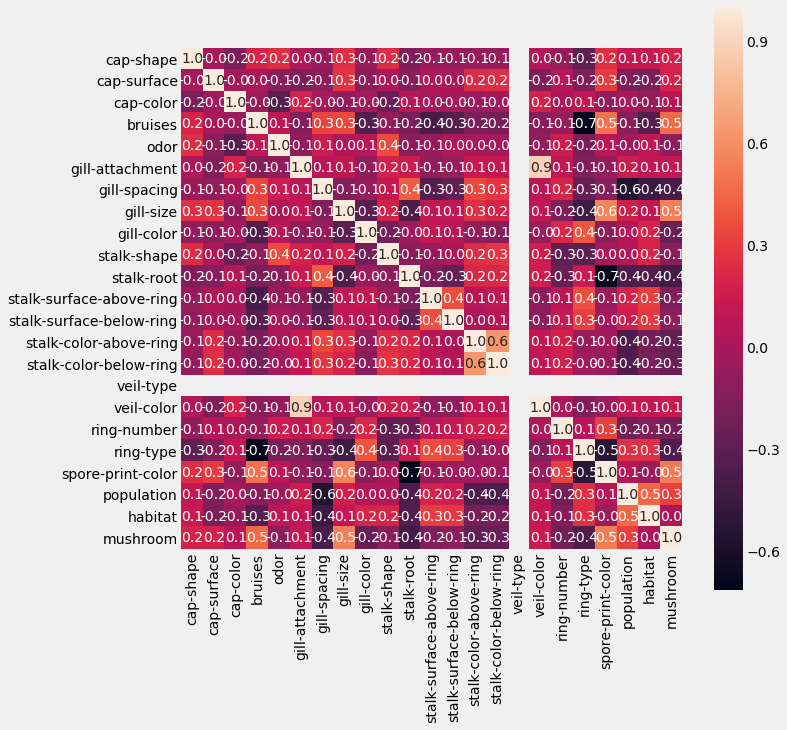

In [11]:
# Correlation Matrix
plt.style.use('fivethirtyeight')
plt.subplots(figsize=(10,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" )

In [12]:
## Remove veil-type from the dataset:
data = data.drop('veil-type', 1)

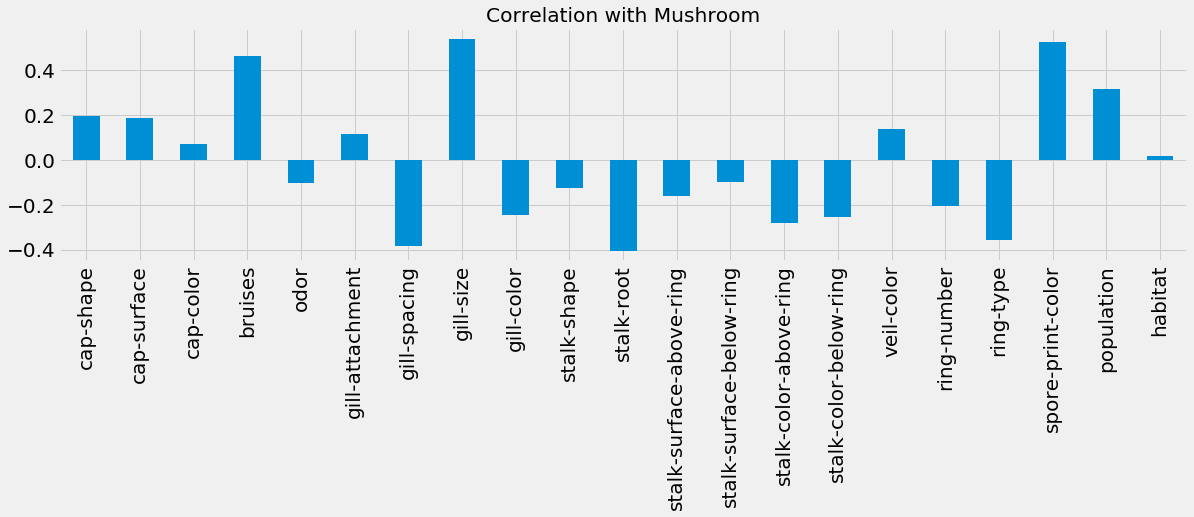

In [13]:
# Relationship between target and features:
plt.style.use('fivethirtyeight')
features = data.drop(['mushroom'],axis=1)
features.corrwith(data['mushroom']).plot.bar(figsize = (18,4), title = "Correlation with Mushroom", 
                                        fontsize = 20,rot = 90, grid = True)

In [14]:
### Separate the features and target variables 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.shape)
print(y.shape)

# Shuffle the dataset
from sklearn.utils import shuffle
X,y = shuffle(X,y)

(8416, 21)
(8416,)


## 3. Researching the model that will be best for the type of data

    -  Import multiple supervised algorithms. 
    -  Train the algorithms 
    -  Check the performances by checking their learning curves, classification report and ROC curve.
    
I have created a classification function - all_in_one, which divides the dataset into three subsets namely,
     1. Training dataset ~ 60% 
     2. Cross Validation dataset ~ 20%
     3. Testing dataset ~20%
     
Also, in this function I have used following classification algorithms to do initial algorithm performance comparison by getting learning curves, classification report and ROC curves.
     1. Logistic Regression Classifier
     2. Decision Tree Classifier
     3. Random Forest Classifier
     4. Support Vector Machine Classifier
     5. Gaussian NB Classifier
     6. K -nearest neighbors Classifier
     7. Gradient Boosting Classifier

### RUN - I    : To get basic understanding of the dataset.

Training Dataset : (5049, 21) (5049,)
Testing Dataset: (1684, 21) (1684,)
Validation Dataset: (1683, 21) (1683,)


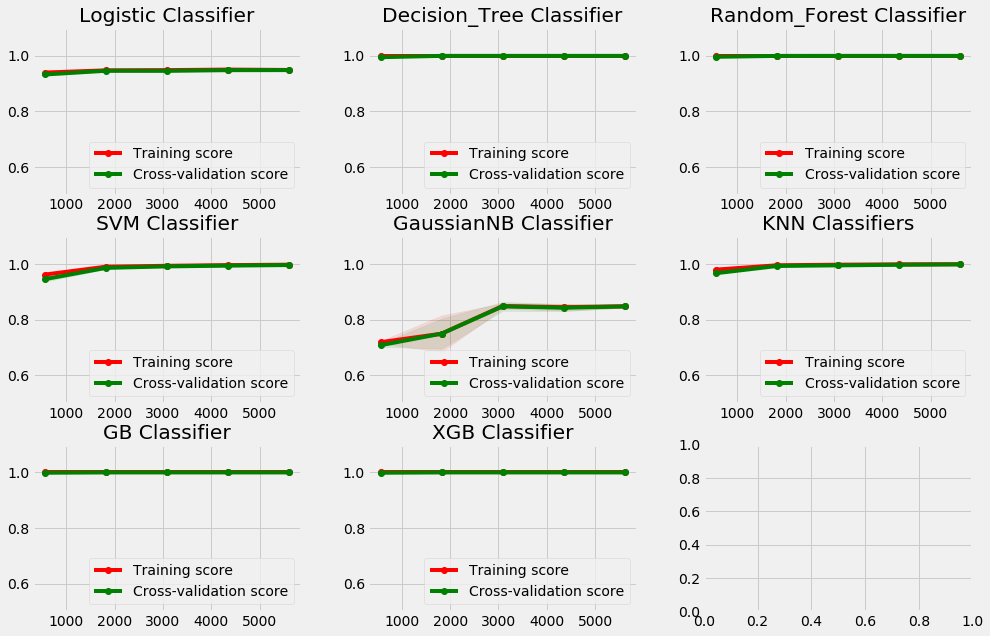

                      Model  Accuracy  Precision    Recall       F1   \
1       Logistic Classifier  0.941771   0.945695  0.926070  0.935780   
2  Decision_Tree Classifier  1.000000   1.000000  1.000000  1.000000   
3  Random_Forest Classifier  1.000000   1.000000  1.000000  1.000000   
4            SVM Classifier  0.995841   1.000000  0.990921  0.995440   
5     GaussianNB Classifier  0.831848   0.794686  0.853437  0.823014   
6           KNN Classifiers  1.000000   1.000000  1.000000  1.000000   
7             GB Classifier  1.000000   1.000000  1.000000  1.000000   
8            XGB Classifier  1.000000   1.000000  1.000000  1.000000   

        ROC      Time  
1  0.940557  0.038731  
2  1.000000  0.006227  
3  1.000000  0.017681  
4  0.995460  0.693391  
5  0.833517  0.002733  
6  1.000000  0.057670  
7  1.000000  0.276787  
8  1.000000  0.323486  




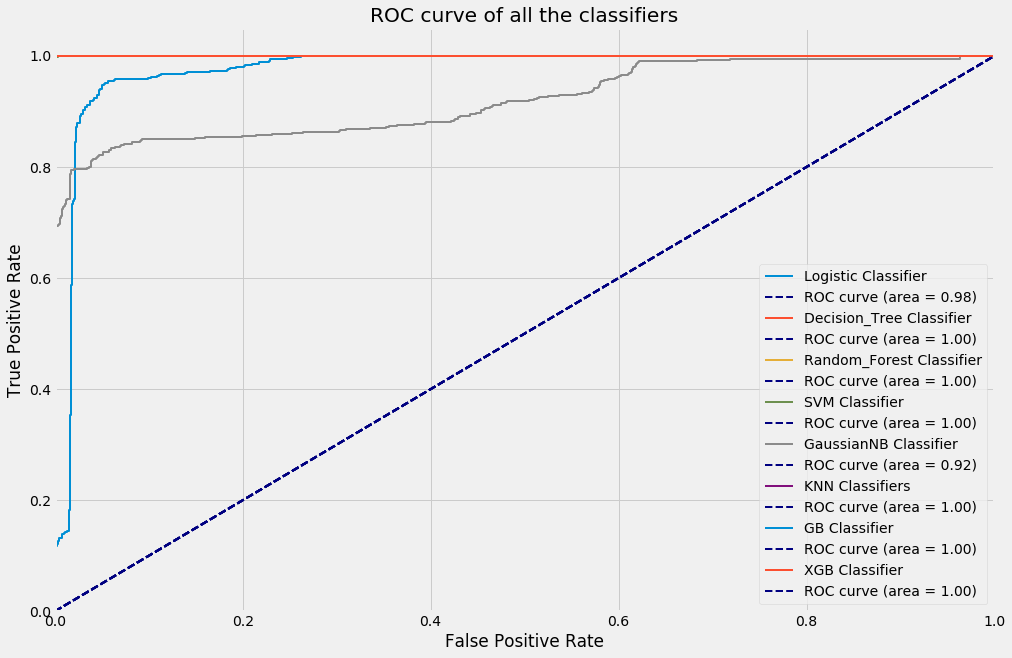

In [15]:
# Import classifiers.py 
import classifiers 

#### Run the all in one 
classifiers.all_in_one(X,y)

##  Testing : 
#### Modify the function to test the model on testing dataset. Change the accuracy matrix parameters from validation set to testing set.  

In [16]:
from classifiers_test import all_in_one_test

all_in_one_test(X,y)

ModuleNotFoundError: No module named 'pandas.tools'

# Conclusion:

All the classifiers are working really good. one can go with any of the classifier used above.

